# Data Analysis Optimised Portfolio 2009-2020

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as wb

In [6]:
# IBEX35 components
stocks = ["SAN.MC","IBE.MC","ITX.MC","BBVA.MC","TEF.MC","AMS.MC","REP.MC","FER.MC","CABK.MC","AENA.MC","IAG.MC","CLNX.MC","GRF.MC","ACS.MC","ELE.MC","REE.MC","NTGY.MC","SGRE.MC","BKT.MC","SAB.MC","MRL.MC","ENG.MC","MAP.MC","BKIA.MC","COL.MC","MTS.MC","ANA.MC","ACX.MC","MAS.MC","VIS.MC","CIE.MC","IDR.MC","MEL.MC","TL5.MC","ENC.MC"]

In [5]:
data = wb.DataReader(stocks, data_source = "yahoo", start = "2009-03-01", end = "2020-02-16")["Adj Close"]

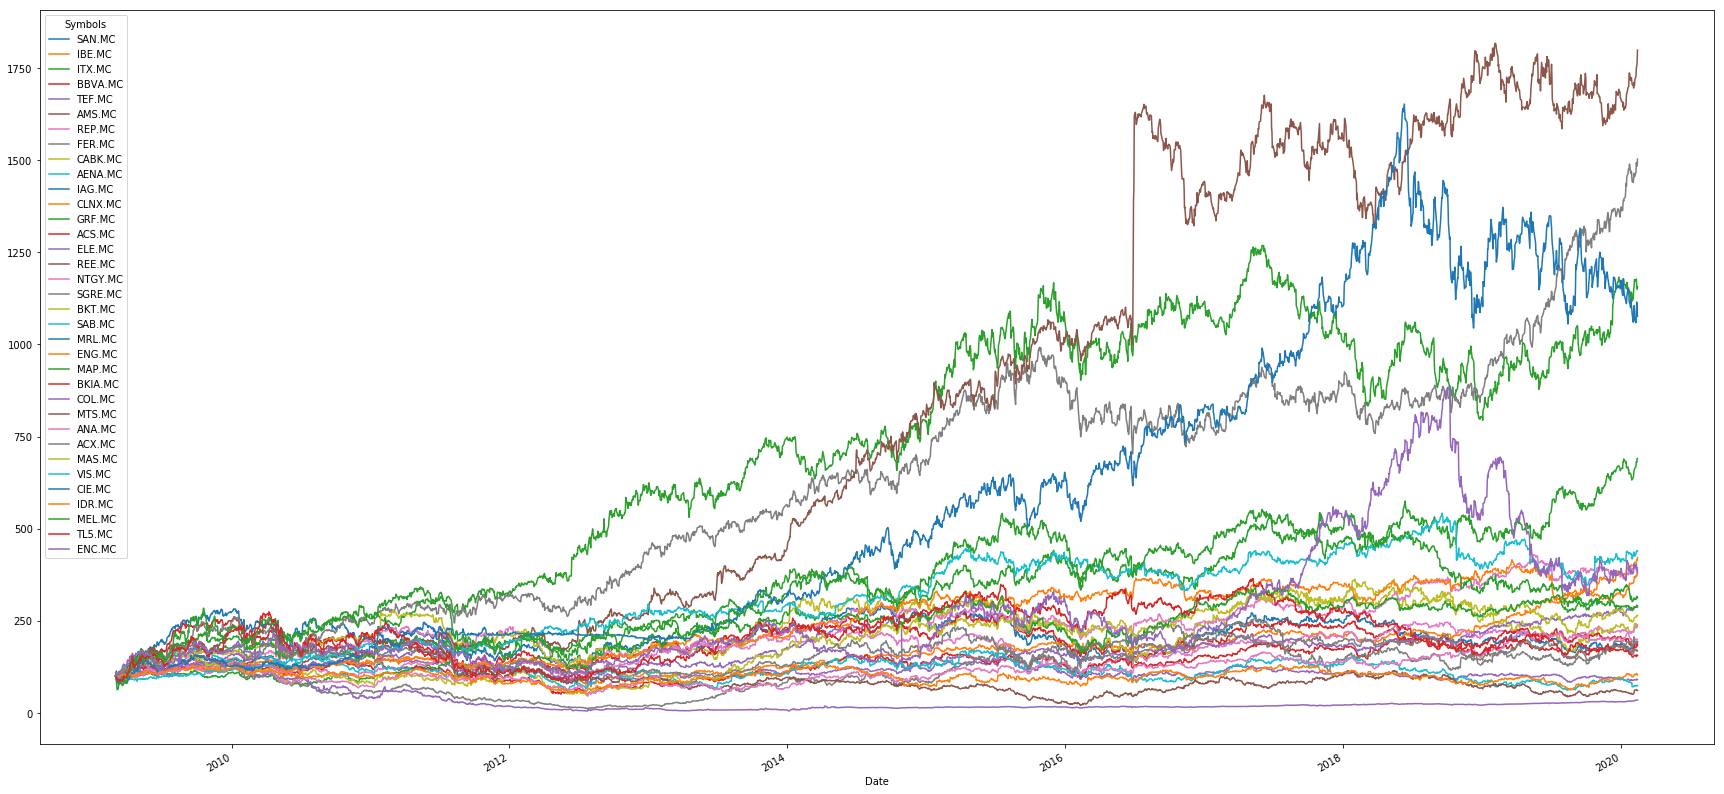

In [6]:
# If 100$ were invested in each stock
(data / data.iloc[0]*100).plot(figsize = (30,15))

In [7]:
# Daily returns
returns = np.log(data / data.shift(1))
returns

Symbols,SAN.MC,IBE.MC,ITX.MC,BBVA.MC,TEF.MC,AMS.MC,REP.MC,FER.MC,CABK.MC,AENA.MC,...,MTS.MC,ANA.MC,ACX.MC,MAS.MC,VIS.MC,CIE.MC,IDR.MC,MEL.MC,TL5.MC,ENC.MC
Date,,,,,,,,,,,,,,,,,,,,,
2009-03-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-03-03,-0.017937,-0.006270,-0.003847,-0.023122,0.006168,NaN,-0.008555,-0.023257,0.004640,NaN,...,0.010400,0.010088,-0.033496,NaN,0.015898,0.000000,-0.001409,-0.102857,0.001922,0.042047
2009-03-04,0.037740,0.041073,-0.033129,0.023122,0.008160,NaN,0.043705,0.037522,-0.013986,NaN,...,0.117016,0.020491,0.034672,NaN,-0.011421,0.097024,0.018157,-0.042560,-0.015475,0.045982
2009-03-05,-0.079317,-0.053732,-0.108948,-0.073083,-0.020534,NaN,-0.031749,-0.082643,-0.038283,NaN,...,-0.099920,-0.032482,-0.049378,NaN,0.011421,-0.097024,-0.023811,-0.185806,-0.074858,-0.040119
2009-03-06,-0.023866,-0.025808,0.021180,-0.037582,-0.010428,NaN,-0.007670,-0.021774,0.024098,NaN,...,-0.019168,-0.016646,0.044666,NaN,0.010044,-0.209091,-0.024391,-0.134280,-0.042925,-0.011760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-10,-0.005848,0.010167,-0.001255,0.002866,-0.006294,0.007609,-0.013020,0.006539,0.000687,-0.003553,...,0.002816,0.001854,-0.007892,0.001561,0.017032,-0.006682,-0.004548,-0.002029,-0.004318,0.010929
2020-02-11,0.008694,0.011971,0.004699,-0.001718,-0.001134,0.002163,0.012236,0.018019,-0.052505,0.002666,...,0.015527,0.010134,0.014667,-0.038701,0.014173,0.015861,0.026092,0.016785,-0.020267,0.013878
2020-02-12,0.021726,-0.007165,-0.015748,0.018179,0.025601,-0.000540,0.001960,-0.004390,0.042846,-0.001777,...,-0.011622,0.011845,0.001476,-0.014702,0.000991,0.035896,0.007961,0.011255,0.029664,-0.024807


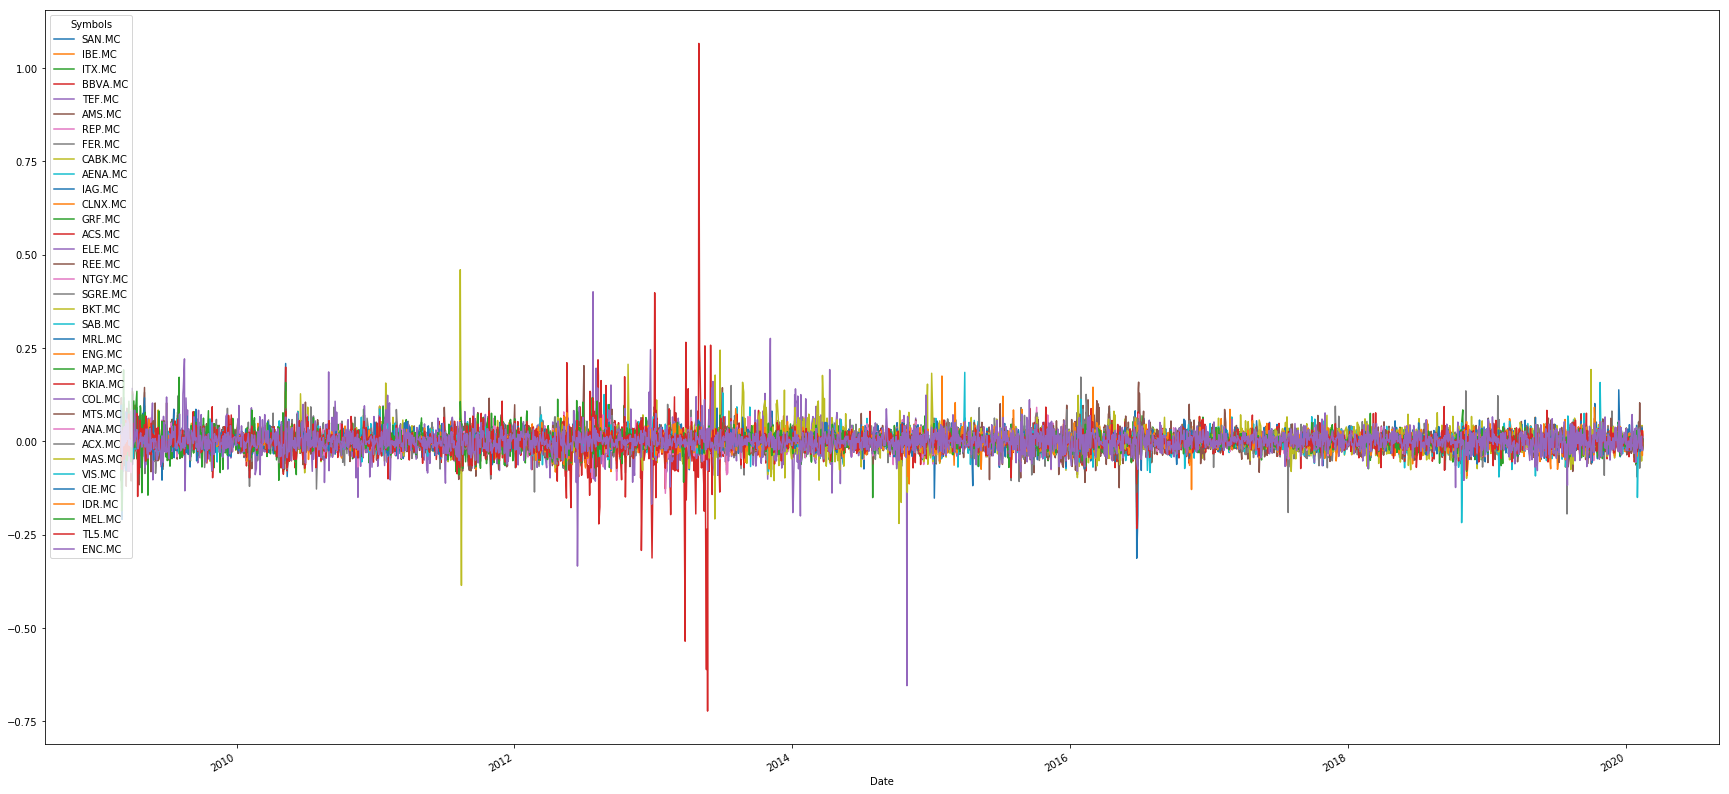

In [8]:
returns.plot(figsize = (30,15))

In [9]:
# Optimisation with SciPy
import scipy.optimize as sco

In [10]:
# Generating random weights of the portfolio components to find the optimal proportion
weights = np.random.random(len(stocks))
weights /= np.sum(weights)

In [11]:
# Fixing the parameters for optimisation
def opt_stats(weights,returns):
    portfolio_return = np.sum(returns.mean()*weights)*252
    portfolio_volatility = np.sqrt(np.dot(weights.T,np.dot(returns.cov()*252,weights)))
    return np.array([portfolio_return,portfolio_volatility,portfolio_return / portfolio_volatility])

opt_stats(weights, returns)

array([0.07030751, 0.18888492, 0.37222406])

In [12]:
constraints = ({"type":"eq","fun":lambda x: np.sum(x)-1})
bounds = tuple((0,1) for x in range(len(stocks)))

In [13]:
def sharpe_func(weights,returns):
    return - opt_stats(weights,returns)[2]

In [14]:
# Maximise Sharpe Ratio: the method for optimisation is Sequential Least Squares Programming, since research shows its accuracy to analyse time series. 
# SciPy only features the option to minimise (and not maximise) a function for SLSQP method, hence I minimised its negative, which equals to maximisation
optimum = sco.minimize(sharpe_func, x0 = weights, args = returns, method = "SLSQP", bounds = bounds, constraints = constraints)

In [15]:
print(optimum)

     fun: -1.7070260403535018
     jac: array([ 1.37545346e+00,  5.55924714e-01,  2.74032354e-05,  1.26099809e+00,
        1.48003541e+00, -3.37138772e-04,  1.01710182e+00,  1.48583949e-03,
        8.38719279e-01,  2.42054462e-04,  8.00796390e-01, -4.37870622e-04,
        2.20837593e-02,  1.18152881e+00,  5.43279156e-01,  3.25739384e-05,
        5.11494994e-01,  1.49208742e+00,  8.42783630e-01,  1.54611272e+00,
        3.81243348e-01,  3.59860376e-01,  8.91038686e-01,  4.39817430e+00,
        1.83225895e+00,  1.87732562e+00,  1.02471858e+00,  8.84194434e-01,
       -4.22447920e-05,  1.63951665e-02,  1.02311373e-04,  1.20308203e+00,
        8.38056132e-01,  1.31397685e+00,  7.31159523e-01])
 message: 'Optimization terminated successfully.'
    nfev: 448
     nit: 12
    njev: 12
  status: 0
 success: True
       x: array([0.00000000e+00, 2.02593745e-15, 5.53964197e-02, 0.00000000e+00,
       7.53873224e-16, 9.28943544e-02, 2.27568500e-16, 6.26582069e-02,
       0.00000000e+00, 1.1632479

In [16]:
# Checking
sum(optimum["x"].round(3))

1.0

In [17]:
print(opt_stats(optimum["x"].round(3),returns))

[0.27812072 0.16292706 1.7070259 ]


In [18]:
results = pd.DataFrame(optimum["x"].round(3),stocks)
results = results*100
results.sort_values(by=0, ascending=False)
# Analysis results: weights in % of the optimal portfolio components based from March 2009 to February 2020, named "Optimised Portfolio 2009-2020"

,0
CLNX.MC,22.4
REE.MC,20.2
MAS.MC,18.4
AENA.MC,11.6
AMS.MC,9.3
FER.MC,6.3
CIE.MC,6.3
ITX.MC,5.5
SAN.MC,0.0
ANA.MC,0.0


In [4]:
# Recapping the process of portfolio optimisation in a single function

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as wb
import scipy.optimize as sco

def portfolio_optimisation(stocks, start, end):
    data = wb.DataReader(stocks, data_source = "yahoo", start = start, end = end)["Adj Close"]
    weights = np.random.random(len(stocks))
    weights /= np.sum(weights)
    returns = np.log(data / data.shift(1))
    portfolio_return = np.sum(returns.mean()*weights)*252
    portfolio_volatility = np.sqrt(np.dot(weights.T,np.dot(returns.cov()*252,weights)))
    opt_stats = np.array([portfolio_return,portfolio_volatility,portfolio_return / portfolio_volatility])
    constraints = ({"type":"eq","fun":lambda x: np.sum(x)-1})
    bounds = tuple((0,1) for x in range(len(stocks)))
    sharpe_func = - opt_stats(weights,returns)[2]
    optimum = sco.minimize(sharpe_func, x0 = weights, args = returns, method = "SLSQP", bounds = bounds, constraints = constraints)
    results = pd.DataFrame(optimum["x"].round(3),stocks)
    results = results*100
    return results.sort_values(by=0, ascending=False)

# Data Analysis Short Term Efficient Portfolio

In [27]:
data_1 = wb.DataReader(stocks, data_source = "yahoo", start = "2020-02-19", end = "2020-03-19")["Adj Close"]

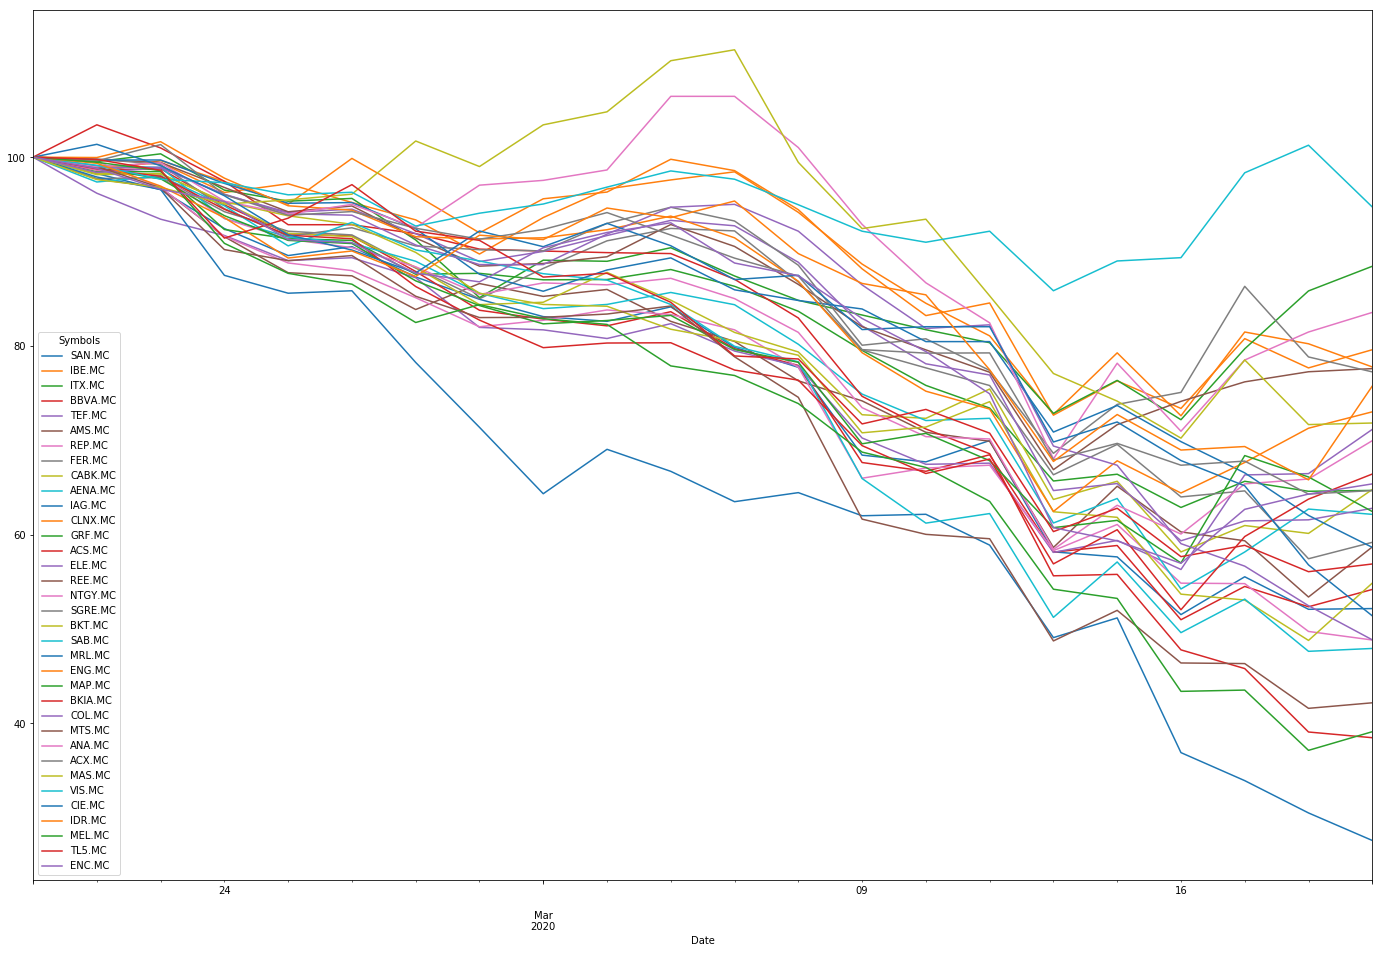

In [20]:
(data_1 / data_1.iloc[0]*100).plot(figsize = (24,16))

In [18]:
data_1

Symbols,SAN.MC,IBE.MC,ITX.MC,BBVA.MC,TEF.MC,AMS.MC,REP.MC,FER.MC,CABK.MC,AENA.MC,...,MTS.MC,ANA.MC,ACX.MC,MAS.MC,VIS.MC,CIE.MC,IDR.MC,MEL.MC,TL5.MC,ENC.MC
Date,,,,,,,,,,,,,,,,,,,,,
2020-02-19,3.736034,10.979756,32.080002,4.895360,6.273540,73.320000,11.649977,30.050488,2.642357,158.261566,...,15.494,115.356064,8.561364,18.100000,50.517998,19.326509,10.760,7.390,5.012,3.708
2020-02-20,3.671176,10.798717,31.580000,4.829130,6.033726,71.620003,11.598094,29.369541,2.593371,156.860611,...,15.344,114.181953,8.527709,17.670000,50.075294,19.589922,10.690,7.350,5.000,3.664
2020-02-21,3.607271,10.940614,31.590000,4.834806,5.861060,70.959999,11.277366,29.399147,2.596252,156.533737,...,14.990,114.671165,8.675416,17.520000,49.337444,19.150904,10.430,7.285,4.942,3.582
2020-02-24,3.453233,10.695967,29.620001,4.647470,5.752664,67.139999,10.673642,28.313580,2.514609,147.987885,...,13.976,109.974739,8.221078,17.200001,49.150520,18.536280,10.070,6.715,4.582,3.534
2020-02-25,3.346407,10.431747,29.309999,4.497979,5.585753,64.339996,10.343481,27.691845,2.429124,144.859085,...,13.794,108.409264,8.034108,17.280001,48.501217,17.736294,9.610,6.480,4.688,3.384
2020-02-26,3.381698,10.965077,29.250000,4.486152,5.604938,64.099998,10.249149,27.573420,2.419519,143.831711,...,13.878,109.583366,8.067763,17.389999,48.638947,17.424105,9.690,6.395,4.866,3.372
2020-02-27,3.261519,10.539392,28.100000,4.302126,5.471601,61.480000,9.914272,26.517458,2.334034,140.796295,...,13.210,106.745941,7.916318,18.410000,46.828758,16.955818,9.400,6.095,4.619,3.252
2020-02-28,3.173292,10.099027,28.129999,4.101070,5.141617,63.500000,9.555811,25.540445,2.229339,135.425964,...,12.860,111.931587,7.817224,17.920000,47.517418,17.814341,9.870,6.235,4.570,3.218
2020-03-02,3.104619,10.495356,27.910000,4.055182,5.125309,62.500000,9.635993,26.507589,2.236062,132.857529,...,12.864,112.518639,7.905099,18.719999,48.009315,17.492395,9.820,6.125,4.375,3.352


In [29]:
# Another approach is used for this data analysis instead of optimisation (due to small data size):

In [28]:
data_1.shape

(22, 35)

In [32]:
returns_1 = (data_1.iloc[21] - data_1.iloc[0]) / data_1.iloc[0]
returns_1.sort_values(ascending = False)
# Analysis results: top 8 stocks in terms of total return % from 19 February to 19 March are selected for the "Short Term Efficient Portfolio"

Symbols
VIS.MC    -0.052775
GRF.MC    -0.115644
ANA.MC    -0.164546
IBE.MC    -0.204100
CLNX.MC   -0.222336
REE.MC    -0.224120
SGRE.MC   -0.227569
IDR.MC    -0.242565
ENG.MC    -0.269906
MAS.MC    -0.281768
TEF.MC    -0.288532
NTGY.MC   -0.300488
BKIA.MC   -0.335840
ENC.MC    -0.346278
CABK.MC   -0.352236
ITX.MC    -0.353180
ACX.MC    -0.353352
ELE.MC    -0.372129
MAP.MC    -0.375572
AENA.MC   -0.378578
FER.MC    -0.408210
AMS.MC    -0.413121
MRL.MC    -0.413534
TL5.MC    -0.431165
BKT.MC    -0.451442
BBVA.MC   -0.458156
SAN.MC    -0.478427
CIE.MC    -0.486118
COL.MC    -0.511538
REP.MC    -0.511741
SAB.MC    -0.520697
MTS.MC    -0.578288
MEL.MC    -0.608931
ACS.MC    -0.615294
IAG.MC    -0.724196
dtype: float64

In [11]:
def total_return_analysis(stocks, start, end):
    data_1 = wb.DataReader(stocks, data_source = "yahoo", start = start, end = end)["Adj Close"]
    returns_1 = (data_1.iloc[data_1.shape[0]-1] - data_1.iloc[0]) / data_1.iloc[0]
    return returns_1.sort_values(ascending = False)